# Calculate VAR for a given portfolio of stocks

## import the necessary libraries

In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime
import statistics as stat

## We will use yahoo finance as a source of financial data, learn more about yahoo finance here https://pypi.org/project/yfinance/

### start by constracting the portfolio, you can get tickers from here : https://stockanalysis.com/trending/

In [2]:
# MSFT : microsoft
# aapl : apple
# tsla : Tesla
# nvda : Nvidia

In [3]:
# porfolio assets
tickers = ["msft", "aapl", "tsla", "nvda"]
# porfolio composition
weights = np.array([0.2, 0.3, 0.25, 0.25])
# initial investment
initial_investment = 10000 #$

In [4]:
df = pd.DataFrame()
# get the close price for each day, for a period of 5 years
for ticker in tickers:
    df[ticker] = yf.Ticker(ticker).history(period = "1y")["Close"]
# get the daily return = (pt - pt-1) / pt-1
returns = df.pct_change()
# get some data to check if everything works fine
returns.head()

,msft,aapl,tsla,nvda
Date,,,,
2022-10-20 00:00:00-04:00,NaN,NaN,NaN,NaN
2022-10-21 00:00:00-04:00,0.025280,0.027059,0.034543,0.022306
2022-10-24 00:00:00-04:00,0.021188,0.014803,-0.014876,0.010669
2022-10-25 00:00:00-04:00,0.013792,0.019338,0.052876,0.052544
2022-10-26 00:00:00-04:00,-0.077156,-0.019627,0.009981,-0.027524


## We should get the covariance matrix, as you know it impacts the VAR of the porfolio

In [5]:
cov_matrix = returns.cov()
cov_matrix

,msft,aapl,tsla,nvda
msft,0.000345,0.000205,0.000239,0.000386
aapl,0.000205,0.000280,0.000293,0.000304
tsla,0.000239,0.000293,0.001409,0.000591
nvda,0.000386,0.000304,0.000591,0.001148


In [49]:
# get the mean for each stock
avg_stocks = returns.mean()

#get the standad deviation for each stock

std_dev = returns.std()

# the previous mean and std_dev should be projected on the porfolio weights to calculate both a weighted mean and std dev

weigted_mean = avg_stocks.dot(weights)*initial_investment
weighted_std_dev = std_dev * weights
weighted_std_dev

msft    0.003713
aapl    0.005019
tsla    0.009383
nvda    0.008471
dtype: float64

In [7]:
#calculate the standard deviation of the portfolio

std_dev = np.sqrt(weighted_std_dev.T.dot(cov_matrix).dot(weighted_std_dev))
risk = std_dev * initial_investment

# Value at Risk with a 99% confidence level over 1 day

## A 99% confidence level corresponds to a Z-value of 2,33 => we're sur 99% of the time that the return will not go below -2.33 x std_dev

In [8]:
portfolio_var = risk * 2.33
print ("The value at risk at 99% confidence level of the given portfolio is : $ " + str(portfolio_var))

The value at risk at 99% confidence level of the given portfolio is : $ 14.993516789189384


## The method used above is called the variance-covariance or Delta normal method, which suppose a normal distribution of the return of our stocks

### let's have a look at this and verify this hypothesis

In [31]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [96]:
def plot_graphs(data, title):
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
    mu, std = norm.fit(data)
    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max , 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title("AAPL returns vs. normal distribution")
    plt.show()

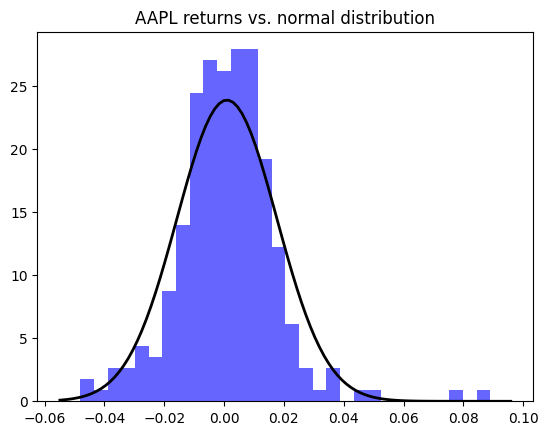

In [105]:
data_aapl = returns.reset_index()['aapl'].dropna()
plot_graphs(data_aapl, "AAPL returns  vs. normal distribution")

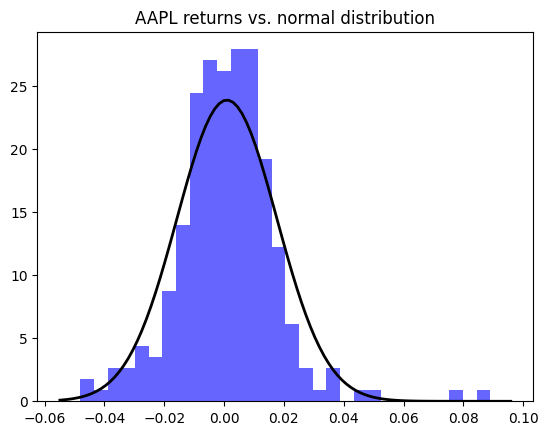

In [106]:
data_msft = returns.reset_index()['aapl'].dropna()
plot_graphs(data_msft, "MSFT returns vs. normal distribution")

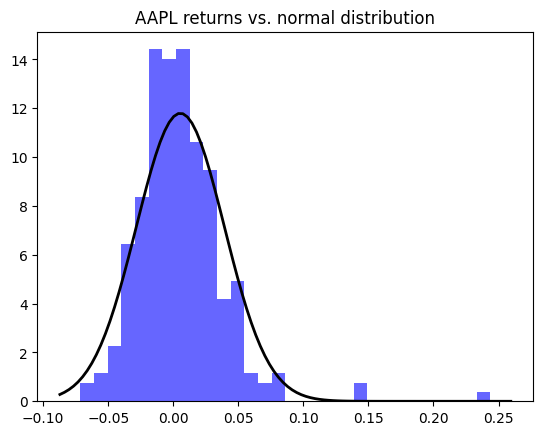

In [107]:
data_nvda = returns.reset_index()['nvda'].dropna()
plot_graphs(data_nvda, "NVDA returns vs. normal distribution")

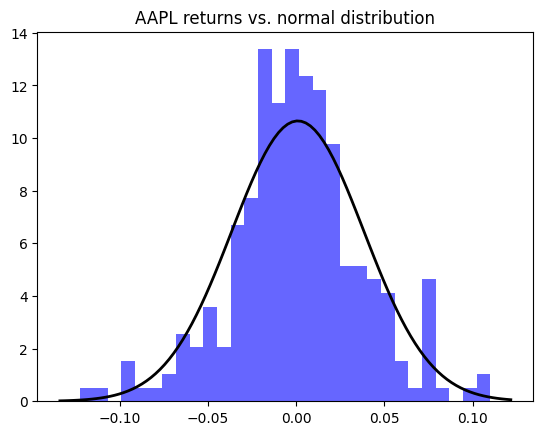

In [108]:
data_tsla = returns.reset_index()['tsla'].dropna()
plot_graphs(data_tsla, "TSLA returns vs. normal distribution")

In [11]:
msft = yf.Ticker("MSFT")

In [12]:
type(msft)

yfinance.ticker.Ticker

In [13]:
df = msft.history(period = "1y")

In [14]:
return_values = df.pct_change()["Close"].stdDev()

AttributeError: 'Series' object has no attribute 'stdDev'

In [ ]:
return_values

In [ ]:
plt.figure()
plt.plot(return_values)
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df['Date']).dt.normalize()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
info_keys = msft.info.keys()

In [ ]:
df["Close"]

In [ ]:
df_max = msft.history(period = "max")

In [ ]:
#plt.bar(df['Date'], df['Close'])
plt.figure()
plt.plot(df_max["Close"])
plt.xlabel("date time")
plt.ylabel("closed value")
plt.show()

In [ ]:
today = datetime.now().date().strftime("%Y-%m-%d")

In [ ]:
df_period = msft.history(start = "2007-01-01", end = today)